# Anticipez les besoins en consommations de bâtiments

## Etape 2 - Réalisez votre feature engineering

* Importation des librairies nécessaires

In [2]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### Reprendre les éléments de notre notebook de l'étape 1

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
building_clean = pd.read_csv("../Data/Projet_3_etape1_clean.csv")

#### Recommendation 1 : Essayer de couvrir, dans la création des features, plusieurs catégories d'informations du jeu de données (localisation, temporalité, structure du bâtiment, etc.)

#### On affecte un nouveau nom à notre dataframe pour avoir nos données de l'analyse exploratoire sans l'étape 2 au cas où

In [4]:
building_clean_second = building_clean

In [5]:
building_clean_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1601 non-null   int64  
 1   DataYear                         1601 non-null   int64  
 2   BuildingType                     1601 non-null   object 
 3   PrimaryPropertyType              1601 non-null   object 
 4   Neighborhood                     1601 non-null   object 
 5   YearBuilt                        1601 non-null   int64  
 6   NumberofBuildings                1601 non-null   float64
 7   NumberofFloors                   1601 non-null   int64  
 8   PropertyGFATotal                 1601 non-null   int64  
 9   PropertyGFAParking               1601 non-null   int64  
 10  PropertyGFABuilding(s)           1601 non-null   int64  
 11  ListOfAllPropertyUseTypes        1601 non-null   object 
 12  LargestPropertyUseTy

* Petit récapitulatif

In [6]:
data_avant_transformation = building_clean_second.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données avant transformation.')

Nous retrouvons 1601 lignes et nous avons 20 colonnes avant le nettoyage des données avant transformation.


#### Ce qui pourrait être intéressant comme création de features :
##### Temporalité :
* Création d'une variable pour avoir l'âge du bâtiment : DataYear - YearBuilt
##### Structure du bâtiment :
* Déterminer le type de ListOfAllPropertyUseTypes
##### Source d'énergies :
* Nombre de sources d'énergies utilisées par le bâtiment
##### Ratio :
* Surface par étage
* Ratio entre les mètres carrés du parking vs le total
* Ratio entre la seconde plus grande utilisation et la surface totale
* Ratio entre la troisième plus grande utilisation et la surface totale
* Ratio entre le nombre d'étages et la capacité du building

#### Recommendation 2 : Il peut être intéressant d'indiquer à un modèle si un bâtiment a plusieurs types d'usages via des features binaires ou des proportions.

#### Nombre d'utilisations du bâtiment

In [7]:
building_clean_second['NumPropertyUseTypes'] = building_clean_second['ListOfAllPropertyUseTypes'].fillna('').apply(
    lambda x: len([use.strip() for use in x.split(',') if use.strip()])
)

In [8]:
building_clean_second['NumPropertyUseTypes'].unique()

array([ 1,  3,  2,  5,  4,  6, 11, 13,  9,  8,  7])

In [9]:
building_clean_second['NumPropertyUseTypes'].value_counts()

NumPropertyUseTypes
1     781
2     490
3     196
4      73
5      37
6      17
9       2
7       2
11      1
13      1
8       1
Name: count, dtype: int64

* On a donc maintenant dans notre dataframe  le nombre total d'usage par bâtiment

#### On peut supprimer la colonne ListOfAllPropertyUseTypes

In [10]:
a_supprimer = ['ListOfAllPropertyUseTypes']
building_clean_second = building_clean_second.drop (columns=a_supprimer)
building_clean_second.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1601 non-null   int64  
 1   DataYear                         1601 non-null   int64  
 2   BuildingType                     1601 non-null   object 
 3   PrimaryPropertyType              1601 non-null   object 
 4   Neighborhood                     1601 non-null   object 
 5   YearBuilt                        1601 non-null   int64  
 6   NumberofBuildings                1601 non-null   float64
 7   NumberofFloors                   1601 non-null   int64  
 8   PropertyGFATotal                 1601 non-null   int64  
 9   PropertyGFAParking               1601 non-null   int64  
 10  PropertyGFABuilding(s)           1601 non-null   int64  
 11  LargestPropertyUseType           1597 non-null   object 
 12  SecondLargestPropert

* On a 1 colonne supprimée et 1 ajoutée

* Petit récapitulatif

In [11]:
data_avant_transformation_un = building_clean_second.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données avant transformation.')
print('Nous retrouvons',data_avant_transformation_un[0],"lignes et nous avons",data_avant_transformation_un[1],"colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.")

Nous retrouvons 1601 lignes et nous avons 20 colonnes avant le nettoyage des données avant transformation.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.


#### Création de la variable âge des bâtiments à partir de l'année de référence et de l'année de construction

* Ja calcule l'âge des bâtiments

In [12]:
building_clean_second['BuildingAge'] = building_clean_second['DataYear']-building_clean_second['YearBuilt']

* Vérification de l'ajout des nouvelles colonnes

In [13]:
building_clean_second.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,LargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),UsageType,NumPropertyUseTypes,BuildingAge
0,1,2016,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,...,Hotel,NaN,NaN,7226362.5,2003882.00,3946027.0,1276453.0,Mono_usage,1,89
1,2,2016,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,...,Hotel,15064.0,4622.0,8387933.0,0.00,3242851.0,5145082.0,Multi_usage,3,20
2,3,2016,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,...,Hotel,NaN,NaN,72587024.0,21566554.00,49526664.0,1493800.0,Mono_usage,1,47
3,5,2016,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,...,Hotel,NaN,NaN,6794584.0,2214446.25,2768924.0,1811213.0,Mono_usage,1,90
4,8,2016,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,...,Hotel,68009.0,0.0,14172606.0,0.00,5368607.0,8803998.0,Multi_usage,3,36


#### On peut supprimer DataYear car nous avons une information plus intéressante désormais.

In [14]:
building_clean_second = building_clean_second.drop(columns="DataYear")

* Petit récapitulatif

In [15]:
data_avant_transformation_deux = building_clean_second.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données avant transformation.')
print('Nous retrouvons',data_avant_transformation_un[0],"lignes et nous avons",data_avant_transformation_un[1],"colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.")
print('Nous retrouvons',data_avant_transformation_deux[0],"lignes et nous avons",data_avant_transformation_deux[1],"colonnes après ajout de la colonne BuildingAge.")

Nous retrouvons 1601 lignes et nous avons 20 colonnes avant le nettoyage des données avant transformation.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après ajout de la colonne BuildingAge.


#### Recommendation 4 : Les valeurs des sources d'énergies (gaz, électricité) ne peuvent pas être utilisées, car cela créerait du data leakage, mais rien ne nous empêche de créer des features indiquant quels types de sources d'énergie existent au sein de chaque bâtiment (ce sont des informations structurelles des bâtiments, indépendantes de l'intensité de la consommation en énergie).

#### J'identifie si oui ou non le bâtiment utilise un type d'énergie

In [16]:
building_clean_second['HasSteam'] = (building_clean_second['SteamUse(kBtu)'] > 0).astype(int)
building_clean_second['HasElectricity'] = (building_clean_second['Electricity(kBtu)'] > 0).astype(int)
building_clean_second['HasGas'] = (building_clean_second['NaturalGas(kBtu)'] > 0).astype(int)

#### Il serait intéressant d'avoir le nombre de sources d'énergies par bâtiment. On fait la sommme de nos 3 colonnes que l'on vient d'ajouter.

In [17]:
building_clean_second['NbSourcesEnergies'] = (
    building_clean_second['HasSteam'] + building_clean_second['HasElectricity'] + building_clean_second['HasGas']
)
    

* Vérification des nouvelles colonnes

In [18]:
building_clean_second.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),UsageType,NumPropertyUseTypes,BuildingAge,HasSteam,HasElectricity,HasGas,NbSourcesEnergies
0,1,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,...,2003882.00,3946027.0,1276453.0,Mono_usage,1,89,1,1,1,3
1,2,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,...,0.00,3242851.0,5145082.0,Multi_usage,3,20,0,1,1,2
2,3,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,...,21566554.00,49526664.0,1493800.0,Mono_usage,1,47,1,1,1,3
3,5,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,...,2214446.25,2768924.0,1811213.0,Mono_usage,1,90,1,1,1,3
4,8,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,...,0.00,5368607.0,8803998.0,Multi_usage,3,36,0,1,1,2


* Colonnes bien enregistrées

#### Suppression des valeurs des sources d'énergies

In [19]:
a_supprimer = ['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']
building_clean_second = building_clean_second.drop(columns = a_supprimer)
building_clean_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1601 non-null   int64  
 1   BuildingType                     1601 non-null   object 
 2   PrimaryPropertyType              1601 non-null   object 
 3   Neighborhood                     1601 non-null   object 
 4   YearBuilt                        1601 non-null   int64  
 5   NumberofBuildings                1601 non-null   float64
 6   NumberofFloors                   1601 non-null   int64  
 7   PropertyGFATotal                 1601 non-null   int64  
 8   PropertyGFAParking               1601 non-null   int64  
 9   PropertyGFABuilding(s)           1601 non-null   int64  
 10  LargestPropertyUseType           1597 non-null   object 
 11  SecondLargestPropertyUseTypeGFA  818 non-null    float64
 12  ThirdLargestProperty

* Petit récapitulatif

In [20]:
data_avant_transformation_trois = building_clean_second.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données avant transformation.')
print('Nous retrouvons',data_avant_transformation_un[0],"lignes et nous avons",data_avant_transformation_un[1],"colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.")
print('Nous retrouvons',data_avant_transformation_deux[0],"lignes et nous avons",data_avant_transformation_deux[1],"colonnes après ajout de la colonne BuildingAge.")
print('Nous retrouvons',data_avant_transformation_trois[0],"lignes et nous avons",data_avant_transformation_trois[1],"colonnes après ajout et suppression des sources d'énergie.")

Nous retrouvons 1601 lignes et nous avons 20 colonnes avant le nettoyage des données avant transformation.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après ajout de la colonne BuildingAge.
Nous retrouvons 1601 lignes et nous avons 21 colonnes après ajout et suppression des sources d'énergie.


#### Création de ratio

* Création du ratio des mètres carrés du parking vs le total

In [21]:
numerator = building_clean_second['PropertyGFAParking'].fillna(0)
denominator = building_clean_second['PropertyGFATotal'].fillna(0)
building_clean_second['ParkingRatio'] = numerator / denominator

* Création du ratio des mètres carrés du second plus grand type d'usage du bâtiment vs le total
* Ajout d'un fillna pour avoir 0 si pas de données

In [22]:
numerator_deux = building_clean_second['SecondLargestPropertyUseTypeGFA'].fillna(0)
denominator_deux = building_clean_second['PropertyGFATotal'].fillna(0)
building_clean_second['SecondUseRatio'] = numerator_deux / denominator_deux

* Création du ratio des mètres carrés du troisième plus grand type d'usage du bâtiment vs le total
* Ajout d'un fillna pour avoir 0 si pas de données

In [23]:
numerator_trois = building_clean_second['ThirdLargestPropertyUseTypeGFA'].fillna(0)
denominator_trois = building_clean_second['PropertyGFATotal'].fillna(0)
building_clean_second['ThirdUseRatio'] = numerator_trois / denominator_trois

* Création du ratio de la surface par étage

In [24]:
numerator_quatre =  building_clean_second['PropertyGFATotal'].fillna(0)
denominator_quatre = building_clean_second['NumberofFloors'].fillna(0)
building_clean_second['AreaPerFloor'] = numerator_quatre / denominator_quatre

* Volume approximatif du bâtiment


In [25]:
numerator_cinq = building_clean_second['PropertyGFABuilding(s)'].fillna(0)
denominator_cinq = building_clean_second['NumberofFloors'].fillna(0)
building_clean_second['BuildingVolume'] = numerator_cinq * denominator_cinq

In [26]:
building_clean_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1601 non-null   int64  
 1   BuildingType                     1601 non-null   object 
 2   PrimaryPropertyType              1601 non-null   object 
 3   Neighborhood                     1601 non-null   object 
 4   YearBuilt                        1601 non-null   int64  
 5   NumberofBuildings                1601 non-null   float64
 6   NumberofFloors                   1601 non-null   int64  
 7   PropertyGFATotal                 1601 non-null   int64  
 8   PropertyGFAParking               1601 non-null   int64  
 9   PropertyGFABuilding(s)           1601 non-null   int64  
 10  LargestPropertyUseType           1597 non-null   object 
 11  SecondLargestPropertyUseTypeGFA  818 non-null    float64
 12  ThirdLargestProperty

* Vérification des éléments

In [27]:
building_clean_second.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,BuildingAge,HasSteam,HasElectricity,HasGas,NbSourcesEnergies,ParkingRatio,SecondUseRatio,ThirdUseRatio,AreaPerFloor,BuildingVolume
0,1,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,...,89,1,1,1,3,0.000000,0.000000,0.000000,7369.500000,1061208
1,2,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,...,20,0,1,1,2,0.145453,0.145453,0.044629,9415.090909,973522
2,3,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,...,47,1,1,1,3,0.205748,0.000000,0.000000,23319.756098,31135072
3,5,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,...,90,1,1,1,3,0.000000,0.000000,0.000000,6132.000000,613200
4,8,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,...,36,0,1,1,2,0.353115,0.387339,0.000000,9754.444444,2044440


* Petit récapitulatif

In [28]:
data_avant_transformation_quatre = building_clean_second.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données avant transformation.')
print('Nous retrouvons',data_avant_transformation_un[0],"lignes et nous avons",data_avant_transformation_un[1],"colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.")
print('Nous retrouvons',data_avant_transformation_deux[0],"lignes et nous avons",data_avant_transformation_deux[1],"colonnes après ajout de la colonne BuildingAge.")
print('Nous retrouvons',data_avant_transformation_trois[0],"lignes et nous avons",data_avant_transformation_trois[1],"colonnes après ajout et suppression des sources d'énergie.")
print('Nous retrouvons',data_avant_transformation_quatre[0],"lignes et nous avons",data_avant_transformation_quatre[1],"colonnes après ajout des ratios.")



Nous retrouvons 1601 lignes et nous avons 20 colonnes avant le nettoyage des données avant transformation.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après ajout de la colonne BuildingAge.
Nous retrouvons 1601 lignes et nous avons 21 colonnes après ajout et suppression des sources d'énergie.
Nous retrouvons 1601 lignes et nous avons 26 colonnes après ajout des ratios.


* Nous avons ajouté quelques features qui permettront d'alimenter notre modèle. Nous devons effectuer quelques vérifications avant de passer à la modélisation.

#### Check des valeurs manquantes

In [29]:
building_clean_second.isnull().mean()

OSEBuildingID                      0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
Neighborhood                       0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.000000
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
LargestPropertyUseType             0.002498
SecondLargestPropertyUseTypeGFA    0.489069
ThirdLargestPropertyUseTypeGFA     0.796377
SiteEnergyUse(kBtu)                0.000000
UsageType                          0.000000
NumPropertyUseTypes                0.000000
BuildingAge                        0.000000
HasSteam                           0.000000
HasElectricity                     0.000000
HasGas                             0.000000
NbSourcesEnergies                  0.000000
ParkingRatio                       0.000000
SecondUseRatio                  

* Identification de valeurs manquantes pour les colonnes suivantes : LargestPropertyUseType / LargestPropertyUseTypeGFA / SecondLargestPropertyUseTypeGFA / ThirdLargestPropertyUseTypeGFA

On retrouve des valeurs manquantes pour LargestPropertyUseType. Regardons ça de plus près.

In [30]:
building_clean_second.loc[building_clean_second['LargestPropertyUseType'].isnull(),:]

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,BuildingAge,HasSteam,HasElectricity,HasGas,NbSourcesEnergies,ParkingRatio,SecondUseRatio,ThirdUseRatio,AreaPerFloor,BuildingVolume
331,496,NonResidential,Self-Storage Facility,BALLARD,1946,2.0,2,111445,0,111445,...,70,0,1,1,2,0.0,0.0,0.0,55722.500,222890
788,21103,NonResidential,Hotel,DOWNTOWN,1910,1.0,8,61721,0,61721,...,106,0,1,1,2,0.0,0.0,0.0,7715.125,493768
1297,25568,NonResidential,Small- and Mid-Sized Office,LAKE_UNION,2008,1.0,4,48350,0,48350,...,8,0,1,0,1,0.0,0.0,0.0,12087.500,193400
1314,25711,NonResidential,Restaurant,DOWNTOWN,1913,1.0,3,28800,0,28800,...,103,0,1,1,2,0.0,0.0,0.0,9600.000,86400


* Regardons ce que nous avons comme éléments pour remplacer les valeurs manquantes

In [31]:
building_clean_second.loc[building_clean_second['LargestPropertyUseType'].isnull(),'PrimaryPropertyType']

331           Self-Storage Facility
788                           Hotel
1297    Small- and Mid-Sized Office
1314                     Restaurant
Name: PrimaryPropertyType, dtype: object

* On recupère les OSEBuildingID afin d'identifier les valeurs manquantes 

In [32]:
building_clean_second.loc[building_clean_second['LargestPropertyUseType'].isnull(),'OSEBuildingID']

331       496
788     21103
1297    25568
1314    25711
Name: OSEBuildingID, dtype: int64

* On peut remplacer les NaN de LargestPropertyUseType par ce que l'on voit dans PrimaryPropertyType

In [33]:
building_clean_second.loc[building_clean_second['OSEBuildingID']==496,'LargestPropertyUseType'] = 'Self-Storage Facility'
building_clean_second.loc[building_clean_second['OSEBuildingID']==21103,'LargestPropertyUseType'] = 'Hotel'
building_clean_second.loc[building_clean_second['OSEBuildingID']==25568,'LargestPropertyUseType'] = 'Small- and Mid-Sized Office'
building_clean_second.loc[building_clean_second['OSEBuildingID']==25711,'LargestPropertyUseType'] = 'Restaurant'

#### Suppression des mètres carrés du SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA :
* Nous avons les ratios qui vont nous permettre d'avoir des indications supplémentaires, nous n'avons plus besoin des 2 colonnes d'origine (et elles ont beaucoup de valeurs manquantes)

In [34]:
a_supprimer =['SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']
building_clean_second = building_clean_second.drop(columns = a_supprimer )
building_clean_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OSEBuildingID           1601 non-null   int64  
 1   BuildingType            1601 non-null   object 
 2   PrimaryPropertyType     1601 non-null   object 
 3   Neighborhood            1601 non-null   object 
 4   YearBuilt               1601 non-null   int64  
 5   NumberofBuildings       1601 non-null   float64
 6   NumberofFloors          1601 non-null   int64  
 7   PropertyGFATotal        1601 non-null   int64  
 8   PropertyGFAParking      1601 non-null   int64  
 9   PropertyGFABuilding(s)  1601 non-null   int64  
 10  LargestPropertyUseType  1601 non-null   object 
 11  SiteEnergyUse(kBtu)     1601 non-null   float64
 12  UsageType               1601 non-null   object 
 13  NumPropertyUseTypes     1601 non-null   int64  
 14  BuildingAge             1601 non-null   

* Petit récapitulatif

In [35]:
data_avant_transformation_cinq = building_clean_second.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données avant transformation.')
print('Nous retrouvons',data_avant_transformation_un[0],"lignes et nous avons",data_avant_transformation_un[1],"colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.")
print('Nous retrouvons',data_avant_transformation_deux[0],"lignes et nous avons",data_avant_transformation_deux[1],"colonnes après ajout de la colonne BuildingAge.")
print('Nous retrouvons',data_avant_transformation_trois[0],"lignes et nous avons",data_avant_transformation_trois[1],"colonnes après ajout et suppression des sources d'énergie.")
print('Nous retrouvons',data_avant_transformation_quatre[0],"lignes et nous avons",data_avant_transformation_quatre[1],"colonnes après ajout des ratios.")
print('Nous retrouvons',data_avant_transformation_cinq[0],"lignes et nous avons",data_avant_transformation_cinq[1],"colonnes après suppression de deux colonnes non pertinentes.")

Nous retrouvons 1601 lignes et nous avons 20 colonnes avant le nettoyage des données avant transformation.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après ajout de la colonne BuildingAge.
Nous retrouvons 1601 lignes et nous avons 21 colonnes après ajout et suppression des sources d'énergie.
Nous retrouvons 1601 lignes et nous avons 26 colonnes après ajout des ratios.
Nous retrouvons 1601 lignes et nous avons 24 colonnes après suppression de deux colonnes non pertinentes.


#### Check des statistiques descriptives

In [36]:
building_clean_second.describe()

/Users/florianschorer/Code/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,OSEBuildingID,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),SiteEnergyUse(kBtu),NumPropertyUseTypes,BuildingAge,HasSteam,HasElectricity,HasGas,NbSourcesEnergies,ParkingRatio,SecondUseRatio,ThirdUseRatio,AreaPerFloor,BuildingVolume
count,1601.00000,1601.000000,1601.000000,1601.000000,1.601000e+03,1601.000000,1.601000e+03,1.601000e+03,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1.601000e+03,1.601000e+03
mean,16360.65584,1962.125547,1.089944,4.103685,1.099618e+05,13074.289819,9.688752e+04,7.088956e+06,1.868832,53.874453,0.069332,0.998126,0.720175,1.787633,0.061867,0.119821,0.019280,inf,1.049531e+06
std,13810.27421,32.434200,1.139914,6.571472,1.834136e+05,42710.422128,1.606563e+05,1.320993e+07,1.181221,32.434200,0.254097,0.043261,0.449053,0.496107,0.141233,0.167795,0.054771,NaN,5.723609e+06
min,1.00000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.713320e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.216970e+02,0.000000e+00
25%,583.00000,1930.000000,1.000000,1.000000,2.938000e+04,0.000000,2.830900e+04,1.262235e+06,1.000000,27.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.330900e+04,4.710500e+04
50%,21145.00000,1966.000000,1.000000,2.000000,4.888200e+04,0.000000,4.679700e+04,2.590622e+06,2.000000,50.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.291353e+04,1.022220e+05
75%,24599.00000,1989.000000,1.000000,4.000000,1.036970e+05,0.000000,9.440000e+04,6.901554e+06,2.000000,86.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.230115,0.000000,3.800500e+04,3.307380e+05
max,50226.00000,2015.000000,27.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.639460e+08,13.000000,116.000000,1.000000,1.000000,1.000000,3.000000,0.895023,1.452054,0.489796,inf,1.240943e+08


* On remarque une incohérence pour la colonne AreaPerFloor avec des valeurs infinies, surement causé par un divisé par 0.

In [37]:
building_clean_second.loc[np.isinf(building_clean_second['AreaPerFloor']), :]

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,BuildingAge,HasSteam,HasElectricity,HasGas,NbSourcesEnergies,ParkingRatio,SecondUseRatio,ThirdUseRatio,AreaPerFloor,BuildingVolume
152,267,NonResidential,Hotel,DOWNTOWN,1999,1.0,0,934292,0,934292,...,17,0,1,1,2,0.0,0.469613,0.053195,inf,0
461,656,NonResidential,Medical Office,EAST,2004,1.0,0,225982,0,225982,...,12,1,1,0,2,0.0,0.000000,0.000000,inf,0
531,758,NonResidential,Other,DOWNTOWN,1999,1.0,0,947987,0,947987,...,17,0,1,0,1,0.0,0.105487,0.084389,inf,0
1034,23311,NonResidential,Medical Office,EAST,1945,1.0,0,274568,0,274568,...,71,1,1,0,2,0.0,0.495156,0.000000,inf,0
1116,24086,Campus,Other,GREATER_DUWAMISH,1991,10.0,0,230971,0,230971,...,25,0,1,1,2,0.0,0.000000,0.000000,inf,0
1511,40028,NonResidential,Warehouse,NORTHEAST,1940,1.0,0,384772,0,384772,...,76,0,1,1,2,0.0,0.166000,0.000000,inf,0
1512,40031,NonResidential,Medical Office,NORTHEAST,1960,1.0,0,30287,0,30287,...,56,0,1,1,2,0.0,0.000000,0.000000,inf,0
1513,40034,NonResidential,Small- and Mid-Sized Office,NORTHEAST,1960,1.0,0,21931,0,21931,...,56,0,1,1,2,0.0,1.452054,0.000000,inf,0
1524,49705,Nonresidential COS,Other,NORTHEAST,1929,8.0,0,502030,0,502030,...,87,0,1,1,2,0.0,0.000000,0.000000,inf,0
1560,49966,NonResidential,Other,SOUTHEAST,2009,1.0,0,40265,0,40265,...,7,0,1,1,2,0.0,0.000000,0.000000,inf,0


Les valeurs infinies sont causés par le fait que le nombre d'étages est à 0. Il y a seulement 14 valeurs. Pour ne pas alléger le nombre de données et parce que le ratio peut être intéressant pour notre modèle, on décide de remplacer le nombre d'étages à 0 par 1. Cela ne va pas fondamentalement tronquer notre jeu, c'est la meilleure solution.

* Je remplace les valeurs et je recalcule le ratio pour  le mettre à jour

In [38]:
building_clean_second.loc[building_clean_second['NumberofFloors'] == 0, 'NumberofFloors'] = 1
numerator_quatre =  building_clean_second['PropertyGFATotal'].fillna(0)
denominator_quatre = building_clean_second['NumberofFloors'].fillna(0)
building_clean_second['AreaPerFloor'] = numerator_quatre / denominator_quatre
building_clean_second.loc[np.isinf(building_clean_second['AreaPerFloor']), :]

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,BuildingAge,HasSteam,HasElectricity,HasGas,NbSourcesEnergies,ParkingRatio,SecondUseRatio,ThirdUseRatio,AreaPerFloor,BuildingVolume


* Petit récapitulatif

In [39]:
data_avant_transformation_six = building_clean_second.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données avant transformation.')
print('Nous retrouvons',data_avant_transformation_un[0],"lignes et nous avons",data_avant_transformation_un[1],"colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.")
print('Nous retrouvons',data_avant_transformation_deux[0],"lignes et nous avons",data_avant_transformation_deux[1],"colonnes après ajout de la colonne BuildingAge.")
print('Nous retrouvons',data_avant_transformation_trois[0],"lignes et nous avons",data_avant_transformation_trois[1],"colonnes après ajout et suppression des sources d'énergie.")
print('Nous retrouvons',data_avant_transformation_quatre[0],"lignes et nous avons",data_avant_transformation_quatre[1],"colonnes après ajout des ratios.")
print('Nous retrouvons',data_avant_transformation_cinq[0],"lignes et nous avons",data_avant_transformation_cinq[1],"colonnes après suppression de deux colonnes non pertinentes.")
print('Nous retrouvons',data_avant_transformation_six[0],"lignes et nous avons",data_avant_transformation_six[1],"colonnes après suppression de valeurs infinies.")

Nous retrouvons 1601 lignes et nous avons 20 colonnes avant le nettoyage des données avant transformation.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après ajout de la colonne BuildingAge.
Nous retrouvons 1601 lignes et nous avons 21 colonnes après ajout et suppression des sources d'énergie.
Nous retrouvons 1601 lignes et nous avons 26 colonnes après ajout des ratios.
Nous retrouvons 1601 lignes et nous avons 24 colonnes après suppression de deux colonnes non pertinentes.
Nous retrouvons 1601 lignes et nous avons 24 colonnes après suppression de valeurs infinies.


#### On peut regarder la relation entre nos variables numériques via la matrice de corrélation
* L'idée ici est de regarder les relations entre les features (hors target) afin d'enlever celles qui sont trop correlées entre elles.

Nos variables numériques :
* YearBuilt
* NumberofBuildings
* NumberofFloors
* PropertyGFATotal
* PropertyGFAParking
* PropertyGFABuilding(s)
* BuildingAge
* NbSourcesEnergies
* ParkingRatio
* LargestUseRatio
* SecondUseRatio
* ThirdUseRatio
* AreaPerFloor
* NumPropertyUseTypes
* BuildingVolume

In [40]:
building_clean_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OSEBuildingID           1601 non-null   int64  
 1   BuildingType            1601 non-null   object 
 2   PrimaryPropertyType     1601 non-null   object 
 3   Neighborhood            1601 non-null   object 
 4   YearBuilt               1601 non-null   int64  
 5   NumberofBuildings       1601 non-null   float64
 6   NumberofFloors          1601 non-null   int64  
 7   PropertyGFATotal        1601 non-null   int64  
 8   PropertyGFAParking      1601 non-null   int64  
 9   PropertyGFABuilding(s)  1601 non-null   int64  
 10  LargestPropertyUseType  1601 non-null   object 
 11  SiteEnergyUse(kBtu)     1601 non-null   float64
 12  UsageType               1601 non-null   object 
 13  NumPropertyUseTypes     1601 non-null   int64  
 14  BuildingAge             1601 non-null   

J'enregistre mes colonnes numériques

In [41]:
col_corr_un = [
    'YearBuilt','NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFABuilding(s)',
    'BuildingAge','NbSourcesEnergies', 'NumPropertyUseTypes','PropertyGFAParking',
    'ParkingRatio','SecondUseRatio','ThirdUseRatio','AreaPerFloor','BuildingVolume'
    ]

Je réalise la matrice de corrélation

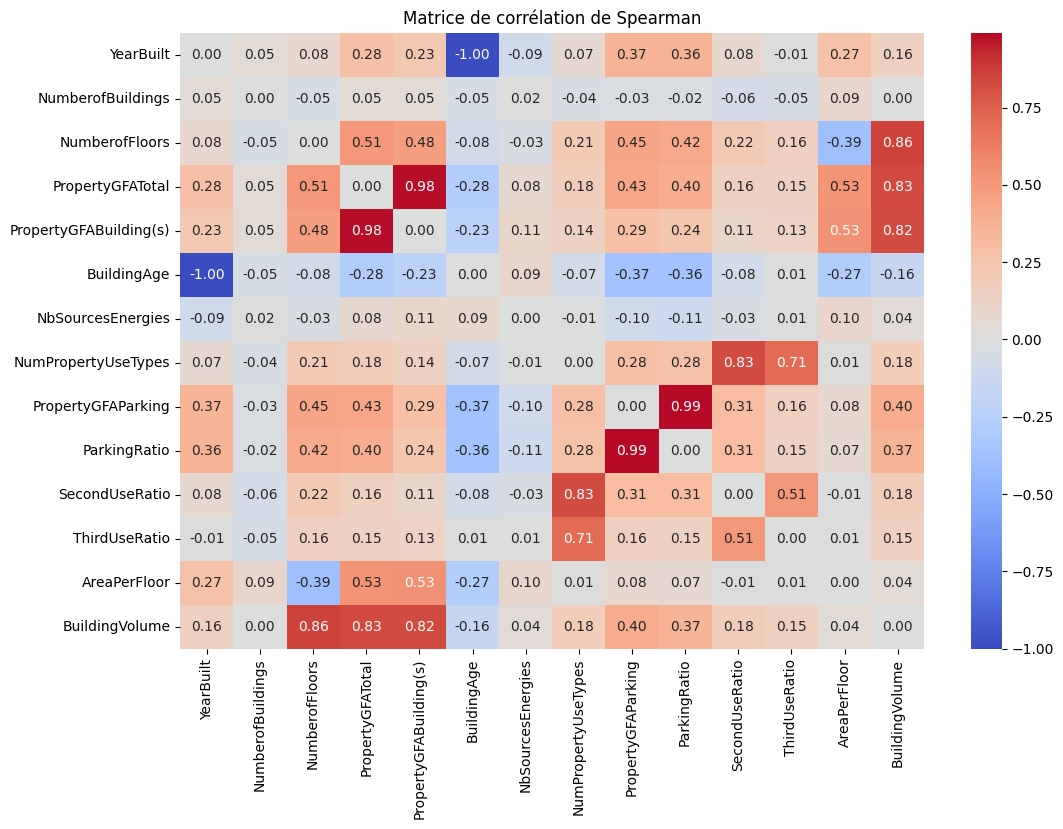

In [42]:
building_clean_second_corr = building_clean_second[col_corr_un]
spearman_corr = building_clean_second_corr.corr(numeric_only=True, method = 'spearman')
np.fill_diagonal(spearman_corr.values, 0)
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Matrice de corrélation de Spearman")
plt.show()

Ici on voit que les variables fortement correlées (>0,70) sont :
* PropertyGFABuilding(s)
* YearBuilt (correlation négative parfaite avec BuildingAge)
* ParkingRatio
* BuildingVolume

On doit donc s'en séparer afin de ne pas avoir de redondance.

On peut garder les autres pour le moment : 
* NumberofBuildings
* NumberofFloors
* PropertyGFATotal
* BuildingAge
* NbSourcesEnergies
* NumPropertyUseTypes
* PropertyGFAParking
* SecondUseRatio
* ThirdUseRatio
* AreaPerFloor

In [43]:
a_supprimer = ['PropertyGFABuilding(s)','YearBuilt','BuildingVolume','ParkingRatio']
building_clean_second = building_clean_second.drop(columns=a_supprimer)
building_clean_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OSEBuildingID           1601 non-null   int64  
 1   BuildingType            1601 non-null   object 
 2   PrimaryPropertyType     1601 non-null   object 
 3   Neighborhood            1601 non-null   object 
 4   NumberofBuildings       1601 non-null   float64
 5   NumberofFloors          1601 non-null   int64  
 6   PropertyGFATotal        1601 non-null   int64  
 7   PropertyGFAParking      1601 non-null   int64  
 8   LargestPropertyUseType  1601 non-null   object 
 9   SiteEnergyUse(kBtu)     1601 non-null   float64
 10  UsageType               1601 non-null   object 
 11  NumPropertyUseTypes     1601 non-null   int64  
 12  BuildingAge             1601 non-null   int64  
 13  HasSteam                1601 non-null   int64  
 14  HasElectricity          1601 non-null   

* Petit récapitulatif

In [44]:
data_avant_transformation_sept = building_clean_second.shape
print('Nous retrouvons',data_avant_transformation[0],'lignes et nous avons',data_avant_transformation[1],'colonnes avant le nettoyage des données avant transformation.')
print('Nous retrouvons',data_avant_transformation_un[0],"lignes et nous avons",data_avant_transformation_un[1],"colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.")
print('Nous retrouvons',data_avant_transformation_deux[0],"lignes et nous avons",data_avant_transformation_deux[1],"colonnes après ajout de la colonne BuildingAge.")
print('Nous retrouvons',data_avant_transformation_trois[0],"lignes et nous avons",data_avant_transformation_trois[1],"colonnes après ajout et suppression des sources d'énergie.")
print('Nous retrouvons',data_avant_transformation_quatre[0],"lignes et nous avons",data_avant_transformation_quatre[1],"colonnes après ajout des ratios.")
print('Nous retrouvons',data_avant_transformation_cinq[0],"lignes et nous avons",data_avant_transformation_cinq[1],"colonnes après suppression de deux colonnes non pertinentes.")
print('Nous retrouvons',data_avant_transformation_six[0],"lignes et nous avons",data_avant_transformation_six[1],"colonnes après suppression de valeurs infinies.")
print('Nous retrouvons',data_avant_transformation_sept[0],"lignes et nous avons",data_avant_transformation_sept[1],"colonnes après suppression de 4 colonnes redondantes.")

Nous retrouvons 1601 lignes et nous avons 20 colonnes avant le nettoyage des données avant transformation.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après ajout et suppression d'une colonne liée au nombre de type de bâtiment.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après ajout de la colonne BuildingAge.
Nous retrouvons 1601 lignes et nous avons 21 colonnes après ajout et suppression des sources d'énergie.
Nous retrouvons 1601 lignes et nous avons 26 colonnes après ajout des ratios.
Nous retrouvons 1601 lignes et nous avons 24 colonnes après suppression de deux colonnes non pertinentes.
Nous retrouvons 1601 lignes et nous avons 24 colonnes après suppression de valeurs infinies.
Nous retrouvons 1601 lignes et nous avons 20 colonnes après suppression de 4 colonnes redondantes.


### Enregistrement du notebook de la deuxième étape du projet 3

In [ ]:
building_clean_second.to_csv("../Data/Projet_3_etape2_clean.csv", index=False)